Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the pregnancy file.

In [1]:
%matplotlib inline

import nsfg
preg = nsfg.ReadFemPreg()

Select live births, then make a CDF of <tt>totalwgt_lb</tt>. 

In [2]:
import thinkstats2

live = preg[preg.outcome == 1]
cdf = thinkstats2.Cdf(live.totalwgt_lb, label='totalwgt_lb')

Display the CDF.

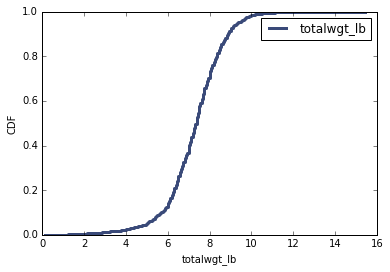

In [3]:
import thinkplot

thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='totalwgt_lb', ylabel='CDF')

Find out how much you weighed at birth, if you can, and compute CDF(x). 

In [4]:
weight = 6.61387

print(cdf.Prob(weight))
print(cdf[weight])

0.279707899978
0.279707899978


If you are a first child, look up your birthweight in the CDF of first children; otherwise use the CDF of other children.

In [5]:
firsts = live[live.birthord == 1]
cdf_first = thinkstats2.Cdf(firsts.totalwgt_lb, label='totalwgt_lb')
cdf_first.Prob(weight)

0.29337611735044694

Compute the percentile rank of your birthweight

In [6]:
cdf_first.PercentileRank(weight)

29.337611735044693

Compute the median birth weight by looking up the value associated with p=0.5.

In [7]:
median = cdf.Value(0.5)
print(median)

7.375


Compute the interquartile range (IQR) by computing percentiles corresponding to 25 and 75. 

In [8]:
IQR = cdf.Percentile(75) - cdf.Percentile(25)
print(IQR)

1.625


Make a random selection from <tt>cdf</tt>.

In [9]:
import random

cdf.Value(random.random())

9.5

Draw a random sample from <tt>cdf</tt>.

In [10]:
cdf.Sample(10)

array([ 6.25  ,  2.5   ,  5.875 ,  6.4375,  8.5625,  5.    ,  7.8125,
        9.8125,  6.5   ,  5.6875])

Draw a random sample from <tt>cdf</tt>, then compute the percentile rank for each value, and plot the distribution of the percentile ranks.

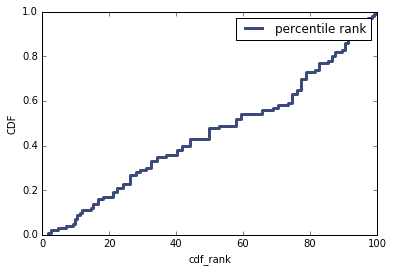

In [11]:
sample = cdf.Sample(100)
ranks = [cdf.PercentileRank(x) for x in sample]

cdf_rank = thinkstats2.Cdf(ranks, label='percentile rank')

thinkplot.Cdf(cdf_rank)
thinkplot.Show(xlabel='cdf_rank', ylabel='CDF')

Generate 1000 random values using <tt>random.random()</tt> and plot their PMF.

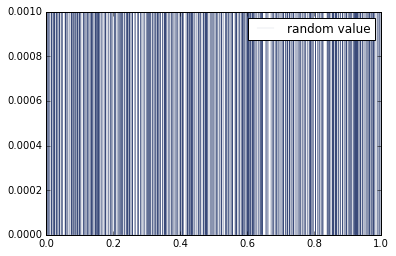

In [12]:
random_sample = [random.random() for _ in range(1000)]
pmf = thinkstats2.Pmf(random_sample, label='random value')
thinkplot.Pmf(pmf, linewidth=0.1)
thinkplot.Show()

Assuming that the PMF doesn't work very well, try plotting the CDF instead.

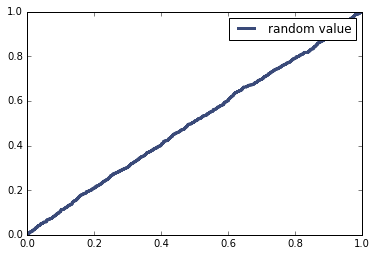

In [13]:
cdf = thinkstats2.Cdf(random_sample, label='random value')
thinkplot.Cdf(cdf)
thinkplot.Show()